In [1]:
import os
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
import cv2
from PIL import Image
from tensorflow import keras
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split 
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Activation, Flatten
from tensorflow.keras import models, layers

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
from tensorflow.keras import backend as K
import pandas as pd
import tensorflow as tf

## Importing our images dataset

In [2]:
# X and y will be our dataset
X = []
y = []

#we now need to import the guitar pedals images from the computer folders

classes = ['Big_Muff', 'Blues_Driver', 'Digital_Delay', 'Hall_of_Fame', 'Background']
base_path = '/Users/em/Documents/GitHub/imageclassifier/src/capture/'

for i, target in enumerate(classes):
    files = os.listdir(base_path+target)
    for file in files:
        # the Macbook auto-created .DStore file can create issues. We'll make sure to only include png files
        if file.endswith('.png'):
            # load the image
            img = Image.open(base_path + target  + '/' + file)
            img = np.array(img)
            
            # some of the arrays seem to be of different length. We only want arrays with the shape 224,224,3
            # which is equivalent to a size of 224*224*3=150528
            if img.size == 150528:
                X.append(img)
                y.append(classes.index(target))

X = np.array(X)
y = np.array(y)

In [3]:
# we need to one hot encode y

y = to_categorical(y)
print(y)

# shuffle the data
shuffler = np.random.permutation(len(X))
X = X[shuffler]
y = y[shuffler]

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


In [4]:
# Below is a function to resize images. As our images are all 224*224 already, we don't need it for now
# but it might become useful if we expand the dataset

def image_resizing(image_path):

    #This function resizes an input image to 224 X 224

    img = image.load_img(image_path, target_size=(224,224))
    return img

In [5]:
# we separate our training and validation dataset...

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((436, 224, 224, 3), (436, 5), (146, 224, 224, 3), (146, 5))

## CNN 'from scratch'

In [6]:
# ...and create a new model!

K.clear_session()

model = Sequential([
    Conv2D(filters=6,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu',input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2,2),strides=2),
    
    Conv2D(filters=16,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
    MaxPooling2D(pool_size=(2,2),strides=2),

    Flatten(),
    
    Dense(units=100,activation='relu'),
    
    # there are 5 classes to recognize, so we set the units of the final layer to 5
    Dense(units=5,activation='softmax')
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 6)       168       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 6)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 16)      880       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0         
_________________________________________________________________
dense (Dense)                (None, 100)               5017700   
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 5

In [8]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
accuracy_metrics = model.fit(X_train,y_train,batch_size=25,epochs=15,validation_split=0.3)

Epoch 1/15
13/13 [==============================] - 4s 235ms/step - loss: 3941.5991 - accuracy: 0.2033 - val_loss: 272.7221 - val_accuracy: 0.3969
Epoch 2/15
13/13 [==============================] - 3s 244ms/step - loss: 347.0090 - accuracy: 0.3115 - val_loss: 171.4092 - val_accuracy: 0.2366
Epoch 3/15
13/13 [==============================] - 3s 264ms/step - loss: 89.0298 - accuracy: 0.4656 - val_loss: 5.2625 - val_accuracy: 0.7023
Epoch 4/15
13/13 [==============================] - 3s 255ms/step - loss: 8.9718 - accuracy: 0.8820 - val_loss: 6.2424 - val_accuracy: 0.7481
Epoch 5/15
13/13 [==============================] - 3s 269ms/step - loss: 1.0006 - accuracy: 0.9377 - val_loss: 68.6408 - val_accuracy: 0.1527
Epoch 6/15
13/13 [==============================] - 3s 259ms/step - loss: 20.4937 - accuracy: 0.6852 - val_loss: 1.3853 - val_accuracy: 0.8397
Epoch 7/15
13/13 [==============================] - 3s 248ms/step - loss: 0.1024 - accuracy: 0.9803 - val_loss: 1.6935 - val_accuracy: 0

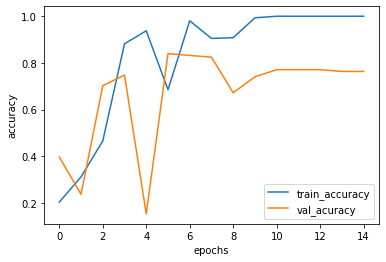

In [9]:
# plotting the accuracy of our train and validation splits

from matplotlib import pyplot as plt
plt.plot(accuracy_metrics.history['accuracy'],label='train_accuracy')
plt.plot(accuracy_metrics.history['val_accuracy'],label='val_acuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

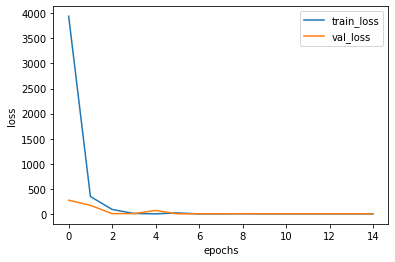

In [10]:
# plotting the loss of our train and validation splits

from matplotlib import pyplot as plt
plt.plot(accuracy_metrics.history['loss'],label='train_loss')
plt.plot(accuracy_metrics.history['val_loss'],label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [11]:

#model.predict(X_test,verbose=1)[image_index].argmax()

5/5 [==============================] - 1s 92ms/step


NameError: name 'image_index' is not defined

In [12]:
# we'll make a function to evaluate the accuracy of our model

def evaluate(model, x, y):
    scores = model.evaluate(x, y, verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

In [13]:
print('Training dataset accuracy')
evaluate(model, X_train, y_train)
print()
print('Test dataset accuracy')
evaluate(model, X_test, y_test)

Training dataset accuracy
accuracy: 92.89%

Test dataset accuracy
accuracy: 82.88%


5/5 [==============================] - 0s 85ms/step
This is a Digital Delay, it can repeat your sound... ound...ound...


,image_class,probability
0,Big_Muff,0.0
1,Blues_Driver,0.0
2,Digital_Delay,100.0
3,Hall_of_Fame,0.0
4,Background,0.0


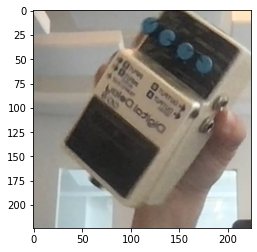

In [14]:
def predict(image_index, model):
    pred = model.predict(X_test,verbose=1)
    
    plt.imshow(X_test[image_index])
    if pred[image_index].argmax() == 0:
        print('This is a Big Muff... best fuzz out there!')
    elif pred[image_index].argmax() == 1:
        print('This is a Blues Driver... a super versatile overdrive')
    elif pred[image_index].argmax() == 2:
        print('This is a Digital Delay, it can repeat your sound... ound...ound...')
    elif pred[image_index].argmax() == 3:
        print('This is a Hall of Fame, a reverb that will give you more space than your ex!')
        
    data = {'image_class': classes,
            'probability': [round(_,5)*100 for _ in pred[image_index]]
           }
    
    df = pd.DataFrame(data=data)
    return df
        

predict(120, model)

## Transfer learning with a pre-trained model

In [15]:
# vgg16
from tensorflow.keras.applications.vgg16 import VGG16, decode_predictions
# resnet50
from tensorflow.keras.applications.resnet50 import ResNet50
# mobilenet_v2
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras import Model

In [16]:
K.clear_session()


base_model = MobileNetV2(
    weights='imagenet', 
    alpha=1.0,         # specific parameter of this model, small alpha reduces the number of overall weights
    pooling='avg',      # applies global average pooling to the output of the last conv layer (like a flattening)
    include_top=False,  # we only want to have the base, not the final dense layers 
    input_shape=(224,224,3)
)

# freeze it!
base_model.trainable = False

In [17]:
def model_builder(hp):
    '''
    Args:
    hp - Keras tuner object
    '''
    # Initialize the Sequential API and start stacking the layers
    model = Sequential()
    model.add(base_model)
    
    # Tune the number of units in the first Dense layer
    # Choose an optimal value between 32-160
    hp_units = hp.Int('units', min_value=45, max_value=160, step=32)
    model.add(Dense(units=hp_units, activation='relu'))
    
    # Add next layers
    model.add(keras.layers.Dropout(0.5))
    model.add(Dense(len(classes), activation='softmax'))
    
    # Tune the learning rate for the optimizer
    # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
              loss=keras.losses.categorical_crossentropy,
              metrics=[keras.metrics.categorical_accuracy])

    return model

In [18]:
# Instantiate the tuner

import keras_tuner as kt

tuner = kt.Hyperband(model_builder, # the hypermodel
                     objective='val_categorical_accuracy', # objective to optimize
                     max_epochs=50,
                     hyperband_iterations=3,
                     project_name='tuning_results')

INFO:tensorflow:Reloading Oracle from existing project ./tuning_results/oracle.json
INFO:tensorflow:Reloading Tuner from ./tuning_results/tuner0.json


In [19]:
# hypertuning settings
tuner.search_space_summary() 

Search space summary
Default search space size: 2
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 160, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [20]:
# Perform hypertuning
stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

tf.autograph.experimental.do_not_convert
tuner.search(X_train, y_train,
             epochs=50,
             batch_size=16,
             callbacks=[stop_early],
             validation_split=1/6)

INFO:tensorflow:Oracle triggered exit


In [21]:
# best hyperparameters
best_hp=tuner.get_best_hyperparameters(1)[0]

In [22]:
# Build the model with the optimal hyperparameters
h_model = tuner.hypermodel.build(best_hp)
h_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 1280)              2257984   
_________________________________________________________________
dense_2 (Dense)              (None, 64)                81984     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 325       
Total params: 2,340,293
Trainable params: 82,309
Non-trainable params: 2,257,984
_________________________________________________________________


In [23]:
tf.autograph.experimental.do_not_convert
h_model.fit(X_train, y_train,
            epochs=50,
            batch_size=16,
            callbacks=[stop_early],
            validation_split=1/6)

Epoch 1/50
23/23 [==============================] - 9s 319ms/step - loss: 2.0798 - categorical_accuracy: 0.3884 - val_loss: 0.9110 - val_categorical_accuracy: 0.6027
Epoch 2/50
23/23 [==============================] - 8s 340ms/step - loss: 0.9792 - categorical_accuracy: 0.6006 - val_loss: 0.5680 - val_categorical_accuracy: 0.8219
Epoch 3/50
23/23 [==============================] - 7s 322ms/step - loss: 0.8214 - categorical_accuracy: 0.6749 - val_loss: 0.4964 - val_categorical_accuracy: 0.8630
Epoch 4/50
23/23 [==============================] - 9s 386ms/step - loss: 0.7635 - categorical_accuracy: 0.7080 - val_loss: 0.3814 - val_categorical_accuracy: 0.9589
Epoch 5/50
23/23 [==============================] - 8s 341ms/step - loss: 0.7116 - categorical_accuracy: 0.7080 - val_loss: 0.2794 - val_categorical_accuracy: 0.9726
Epoch 6/50
23/23 [==============================] - 8s 340ms/step - loss: 0.5353 - categorical_accuracy: 0.7989 - val_loss: 0.2250 - val_categorical_accuracy: 0.9726
Epoc

In [24]:
losses = pd.DataFrame(h_model.history.history) # losses in the training history
epoch = losses.index.values+np.ones_like(losses.index.values) # epoch number
loss = losses['loss'].values # training loss
val_loss = losses['val_loss'].values # validation loss

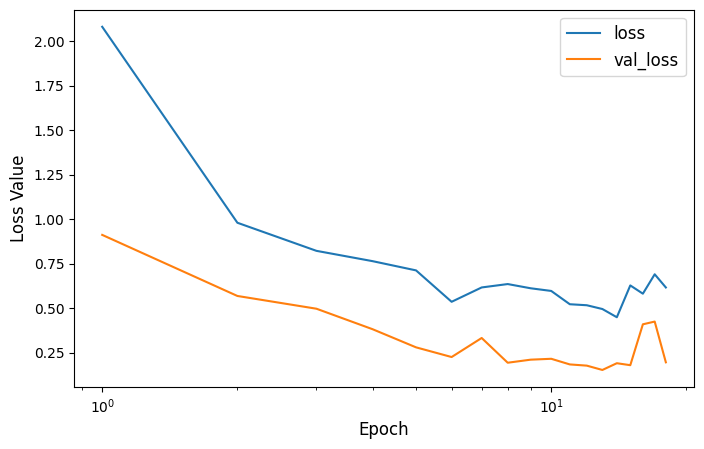

In [25]:
# plot losses against epoch number in log-scale
plt.figure(figsize=(8,5),dpi=100)
plt.semilogx(epoch, loss, linewidth=1.5, label='loss')
plt.semilogx(epoch, val_loss, linewidth=1.5, label='val_loss')
plt.xlabel('Epoch',fontsize=12)
plt.ylabel('Loss Value',fontsize=12)
plt.legend(loc=1,fontsize=12)
None

In [26]:
h_model.predict(X_test)[0]

array([1.8676971e-04, 7.7253510e-09, 3.8805741e-09, 1.1602441e-07,
       9.9981314e-01], dtype=float32)

5/5 [==============================] - 2s 453ms/step
This is a Digital Delay, it can repeat your sound... ound...ound...


,image_class,probability
0,Big_Muff,2.957000
1,Blues_Driver,0.004000
2,Digital_Delay,97.039998
3,Hall_of_Fame,0.000000
4,Background,0.000000


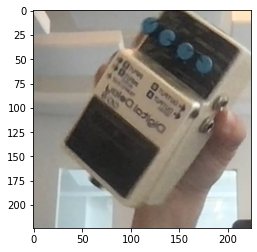

In [27]:
predict(120, h_model)

In [28]:

print('Training dataset accuracy')
evaluate(h_model, X_train, y_train)
print()
print('Test dataset accuracy')
evaluate(h_model, X_test, y_test)

Training dataset accuracy
categorical_accuracy: 99.77%

Test dataset accuracy
categorical_accuracy: 93.15%
